In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
np.set_printoptions(threshold=np.nan)
import random
from math import pi
import math
IMAGE_SIZE = 64

In [12]:
def rotate_images(X_imgs, start_angle=45, end_angle=-45, n_images=2):
    X_rotate = []
#     iterate_at = (end_angle - start_angle) / (n_images - 1)
    do = np.random.uniform(end_angle,start_angle,n_images)
    
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    radian = tf.placeholder(tf.float32, shape = (len(X_imgs)))
    tf_img = tf.contrib.image.rotate(X, radian)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for index in range(n_images):
            degrees_angle = do[index]
            radian_value = degrees_angle * pi / 180  # Convert to radian
            radian_arr = [radian_value] * len(X_imgs)
            rotated_imgs = sess.run(tf_img, feed_dict = {X: X_imgs, radian: radian_arr})
            X_rotate.extend(rotated_imgs)

    X_rotate = np.array(X_rotate, dtype = np.float32)
    return X_rotate


def central_scale_images(X_imgs, scales=np.round(np.random.uniform(0.8,1,3),2)):
    # Various settings needed for Tensorflow operation
    
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for img_data in X_imgs:
            batch_img = np.expand_dims(img_data, axis = 0)
            scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
            X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return X_scale_data
def generate_data(X_imgs):
    
    rotated_imgs = rotate_images(X_imgs)
    rotated_imgs= np.concatenate((X_imgs,rotated_imgs),axis=0)
    scaled_imgs =central_scale_images(rotated_imgs)
    
    result = np.concatenate((rotated_imgs,scaled_imgs),axis=0)
    return result
    

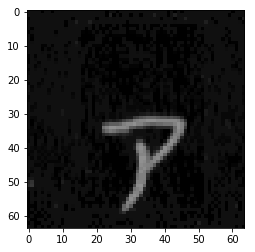

generated_data shape: (24, 64, 64, 3)
num_imgs: 24


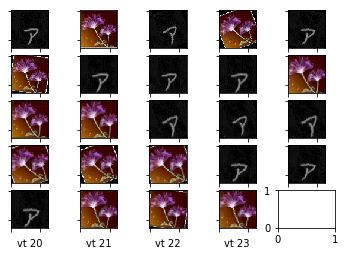

In [13]:
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
p1=r"D:\DatasetJapanese\data_use_kl\a_k\00001.png"
p2 =r"C:\Users\BuiHoang\a_LearnPython\img1.png"
p3=r"C:\Users\BuiHoang\Downloads\englishSpeak\flower.jpg"
p4=r"D:\DatasetJapanese\data_use_kl\a_k\00447.png"
i1 = cv2.imread(p4)
i2= cv2.imread(p3)
i1=cv2.resize(i1,(64,64))
i1= np.multiply(i1,1.0/255.0)

i2=cv2.resize(i2,(64,64))
i2= np.multiply(i2,1.0/255.0)
plt.imshow(i1)
plt.show()

x=np.asarray([i1,i2])
# cv2.imshow("img",i1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

x=np.reshape(x,(-1,64,64,3))

# print(f"shape x: {x.shape}")
# rotated_imgs = rotate_images(x, 45, -45, 3)
# print(f"shape of rotated_imgs: {rotated_imgs.shape}")

# scaled_imgs = central_scale_images(rotated_imgs,scales=[0.8,0.7])
# print(f"scaled imgs shape: {scaled_imgs.shape}")

generated_data = generate_data(x)
print(f"generated_data shape: {generated_data.shape}")
num_imgs = generated_data.shape[0]
print(f"num_imgs: {num_imgs}")
num_grids = math.ceil(math.sqrt(num_imgs))

fig, axes = plt.subplots(num_grids,num_grids)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
do = 140/15

for i, ax in enumerate(axes.flat):
    if i<num_imgs:
#         ax.imshow(rotated_imgs[i])
        
        ax.imshow(generated_data[i])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        ax.set_xlabel(f"vt {i}")

plt.show()


In [11]:
random.randrange(1,10,1)

4

In [34]:
random.sample(range(0.5,1,0.1))

TypeError: 'float' object cannot be interpreted as an integer

In [22]:
a=np.arange(0,18).reshape(3,3,2)
b=np.arange(-18,0).reshape(3,3,2)

c=np.concatenate((a,b),axis=2)
print(c.shape)
print(c)

(3, 3, 4)
[[[  0   1 -18 -17]
  [  2   3 -16 -15]
  [  4   5 -14 -13]]

 [[  6   7 -12 -11]
  [  8   9 -10  -9]
  [ 10  11  -8  -7]]

 [[ 12  13  -6  -5]
  [ 14  15  -4  -3]
  [ 16  17  -2  -1]]]


In [8]:
np.random.uniform(-45,45,3)

array([ 28.58815774, -16.68201706,  20.18879571])